In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_csv("fraudTrain.csv")
df2=pd.read_csv("fraudTest.csv")

In [3]:
print(df1.info())
print(df2.info())
#30.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df=df1.append(df2, ignore_index = True)
df
#unnamed , ttrans_date_trans_time, first,last,

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [5]:
# converting object into numberical values
df['merchant']=df['merchant'].astype('category').cat.codes
df['category']=df['category'].astype('category').cat.codes
df['gender']=df['gender'].astype('category').cat.codes
df['street']=df['street'].astype('category').cat.codes
df['city']=df['city'].astype('category').cat.codes
df['job']=df['job'].astype('category').cat.codes
df['state']=df['state'].astype('category').cat.codes
df['dob']=df['dob'].astype('category').cat.codes
df['trans_date_trans_time']=df['trans_date_trans_time'].astype('category').cat.codes
df.corr()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.171902,0.000063,-0.001043,-0.000130,0.000949,-0.000233,-0.000273,-0.001140,0.001233,0.000370,0.000239,-0.000610,-0.000880,0.000290,0.001711,0.174527,0.000211,-0.000611,0.000524
trans_date_trans_time,0.171902,1.000000,0.000294,-0.000139,0.001116,-0.002413,-0.001373,-0.001464,0.000676,-0.000358,0.001048,0.000729,-0.000603,-0.001622,-0.000323,0.004245,0.999542,0.000689,-0.000601,-0.013286
cc_num,0.000063,0.000294,1.000000,0.000437,0.000327,0.001826,0.000333,0.045937,0.049230,-0.036305,0.041504,-0.058744,-0.048429,-0.009118,0.029930,0.002213,0.000284,-0.058415,-0.048421,-0.001125
merchant,-0.001043,-0.000139,0.000437,1.000000,0.031020,-0.002973,-0.001247,0.000307,-0.000731,-0.000266,0.000692,-0.001450,-0.000348,0.001281,0.000739,0.005710,-0.000169,-0.001362,-0.000353,-0.000424
category,-0.000130,0.001116,0.000327,0.031020,1.000000,0.029665,-0.028088,0.002361,-0.000045,0.000164,0.003013,-0.008526,-0.001406,0.009318,0.002993,0.003809,0.001043,-0.008417,-0.001404,0.019278
amt,0.000949,-0.002413,0.001826,-0.002973,0.029665,1.000000,0.000740,0.001296,-0.000240,0.000433,0.001979,-0.000670,-0.000735,0.004921,-0.001858,0.011501,-0.002411,-0.000613,-0.000711,0.209308
gender,-0.000233,-0.001373,0.000333,-0.001247,-0.028088,0.000740,1.000000,0.042402,0.016330,-0.031085,-0.066106,0.042862,0.050653,-0.028862,-0.079708,-0.012160,-0.001387,0.042621,0.050606,0.005844
street,-0.000273,-0.001464,0.045937,0.000307,0.002361,0.001296,0.042402,1.000000,-0.024595,0.014470,-0.054019,-0.012851,0.071712,-0.012392,-0.018591,-0.042617,-0.001480,-0.012730,0.071667,0.000589
city,-0.001140,0.000676,0.049230,-0.000731,-0.000045,-0.000240,0.016330,-0.024595,1.000000,-0.042611,0.075212,-0.031132,-0.067092,0.034824,0.021540,0.014806,0.000657,-0.030870,-0.067070,-0.001107
state,0.001233,-0.000358,-0.036305,-0.000266,0.000164,0.000433,-0.031085,0.014470,-0.042611,1.000000,-0.116563,0.213532,0.132324,-0.012633,0.043112,0.053565,-0.000331,0.212190,0.132217,-0.000252


In [6]:
df_edit=df.drop(["Unnamed: 0","first","last","trans_num","cc_num","gender","street","city","state","zip","lat","long","merch_lat","merch_long"],axis=1)
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  int32  
 1   merchant               int16  
 2   category               int8   
 3   amt                    float64
 4   city_pop               int64  
 5   job                    int16  
 6   dob                    int16  
 7   unix_time              int64  
 8   is_fraud               int64  
dtypes: float64(1), int16(3), int32(1), int64(3), int8(1)
memory usage: 76.0 MB


In [7]:
# creating new data frame by randomly selecting in 0.75:0.25 ratio
df_new = df_edit.sample(frac = 1).reset_index(drop=True)
# df1_new=df_new.drop('is_fraud',axis='columns')
# df2_new=df_new['is_fraud']
# x_train,x_test,y_train,y_test= train_test_split(df1_new,df2_new, test_size=0.25, random_state=0)
train,test= train_test_split(df_new ,test_size=0.25, random_state=0)

In [8]:
x_test=test.drop('is_fraud',axis='columns')
y_test=test['is_fraud']

In [9]:
x_train=train.drop('is_fraud',axis='columns')
y_train=train['is_fraud']


In [10]:
x_train

,trans_date_trans_time,merchant,category,amt,city_pop,job,dob,unix_time
137248,126855,460,1,56.43,413574,456,494,1331497191
975641,1609327,543,4,120.08,343,131,506,1383119072
573813,900105,309,4,103.85,85,392,716,1356833185
1260711,903116,454,12,4.05,45100,22,883,1356881732
639328,1287700,310,12,8.80,149,431,619,1372177884
...,...,...,...,...,...,...,...,...
152315,623922,678,4,94.99,888,60,793,1348712412
963395,642384,382,10,61.76,13835,368,414,1349440481
117952,276465,129,1,74.58,276896,243,924,1337371706
1484405,1276980,301,8,1.72,42384,207,868,1371865585


In [11]:
# Using SVM classifier
from sklearn.svm import SVC
model=SVC()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
#Using RandomForerstClassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [11]:
x_train.shape

(1389295, 8)

In [12]:
df["is_fraud"].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [12]:
n_inputs=len(x_train.columns)
n_inputs

8

In [11]:
#Using ANN classifier
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [31]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,validation_split=0.33)

2022-07-05 00:19:49.295838: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-05 00:19:49.297765: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 930827 samples, validate on 458468 samples
Epoch 1/3
930827/930827 [==============================] - 37s 40us/sample - loss: 15.2539 - accuracy: 0.0052 - val_loss: 15.2552 - val_accuracy: 0.0051
Epoch 2/3
930827/930827 [==============================] - 155s 166us/sample - loss: 15.2539 - accuracy: 0.0052 - val_loss: 15.2552 - val_accuracy: 0.0051
Epoch 3/3
930827/930827 [==============================] - 93s 100us/sample - loss: 15.2539 - accuracy: 0.0052 - val_loss: 15.2552 - val_accuracy: 0.0051


In [23]:
y_pred=model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    460679
           1       0.00      0.00      0.00      2420

    accuracy                           0.99    463099
   macro avg       0.50      0.50      0.50    463099
weighted avg       0.99      0.99      0.99    463099



In [23]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.5


In [13]:
#Undersampling
df_1=train[train['is_fraud']==1]
df_0=train[train['is_fraud']==0]
df_1.shape,df_0.shape


((7205, 9), (1382090, 9))

In [14]:
x_train,y_train=train.is_fraud.value_counts()
df_0_under=df_0.sample(y_train)
df_0_under.shape

(7205, 9)

In [15]:
df_under=pd.concat([df_0_under,df_1],axis=0)
df_under=df_under.sample(frac=1).reset_index(drop=True)
df_under

,trans_date_trans_time,merchant,category,amt,city_pop,job,dob,unix_time,is_fraud
0,1234880,583,9,148.72,222785,495,212,1370580193,0
1,711818,326,5,38.73,60,302,90,1352048933,0
2,1804059,556,10,8.74,1512,94,977,1388237485,0
3,345781,428,4,298.67,297,10,307,1339629365,1
4,1624392,430,11,823.34,169,272,181,1383690115,1
...,...,...,...,...,...,...,...,...,...
14405,666166,157,2,66.73,1383,278,398,1350284957,0
14406,101096,524,8,862.09,365,432,471,1330472643,1
14407,643759,48,12,816.01,369,287,87,1349475987,1
14408,1388409,610,12,914.18,92043,85,292,1375310803,1


In [16]:
x_train=df_under.drop('is_fraud',axis=1)
y_train=df_under['is_fraud']


In [17]:
y_train.value_counts()

0    7205
1    7205
Name: is_fraud, dtype: int64

In [22]:
# Using SVM classifier
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [23]:
model.score(x_test,y_test)

0.5021107797684728

In [18]:
#Using RandomForerstClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 300).fit(x_train, y_train)

In [19]:
model.score(x_test,y_test)

0.9741459169637594

In [20]:
model.feature_importances_

array([0.02731003, 0.00416327, 0.1047252 , 0.80555274, 0.00625337,
       0.00616265, 0.01996377, 0.02586897])

In [21]:
important_features = pd.DataFrame((model.feature_importances_*100), columns=['importance']).sort_values('importance', ascending=False)
important_features

,importance
3,80.555274
2,10.472520
0,2.731003
7,2.586897
6,1.996377
4,0.625337
5,0.616265
1,0.416327


Text(33.0, 0.5, 'Truth')

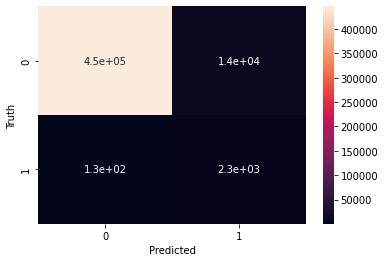

In [92]:
y_predicted=model.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm=confusion_matrix(y_test,y_predicted)
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [93]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    460672
           1       0.14      0.95      0.25      2427

    accuracy                           0.97    463099
   macro avg       0.57      0.96      0.62    463099
weighted avg       1.00      0.97      0.98    463099



In [94]:
#Using ANN classifier
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [95]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(64, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(16, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,batch_size=2)

Epoch 1/3
7224/7224 [==============================] - 12s 2ms/step - loss: 1803651383296000.0000 - accuracy: 0.4999
Epoch 2/3
7224/7224 [==============================] - 11s 2ms/step - loss: 0.6932 - accuracy: 0.5036
Epoch 3/3
7224/7224 [==============================] - 11s 2ms/step - loss: 0.6933 - accuracy: 0.4963


In [96]:
y_pred=np.argmax(model.predict(x_test),axis=1)
y_pred

14472/14472 [==============================] - 18s 1ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    460672
           1       0.00      0.00      0.00      2427

    accuracy                           0.99    463099
   macro avg       0.50      0.50      0.50    463099
weighted avg       0.99      0.99      0.99    463099



In [16]:
#Oversampling using SMOTE
X = df_edit.drop('is_fraud',axis='columns')
y = df_edit['is_fraud']

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)
y_sm.value_counts()

0    1842743
1    1842743
Name: is_fraud, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [21]:
y_train.value_counts()

1    1474194
0    1474194
Name: is_fraud, dtype: int64

In [22]:
#Using ANN classifier
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [38]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Train on 2948388 samples
Epoch 1/3
2948388/2948388 [==============================] - 98s 33us/sample - loss: 7.6666 - accuracy: 0.5000
Epoch 2/3
2948388/2948388 [==============================] - 367s 124us/sample - loss: 7.6666 - accuracy: 0.5000
Epoch 3/3
2948388/2948388 [==============================] - 1414s 479us/sample - loss: 7.6666 - accuracy: 0.5000


In [39]:
y_pred=model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    368549
           1       0.50      1.00      0.67    368549

    accuracy                           0.50    737098
   macro avg       0.25      0.50      0.33    737098
weighted avg       0.25      0.50      0.33    737098



In [42]:
#Using RandomForerstClassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
model.score(x_test,y_test)

0.9971740528396495

In [ ]:
# Using SVM classifier
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)